<a target="_blank" href="https://colab.research.google.com/github/charecktowa/Chemistry-ML/blob/paper/paper/plots.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np

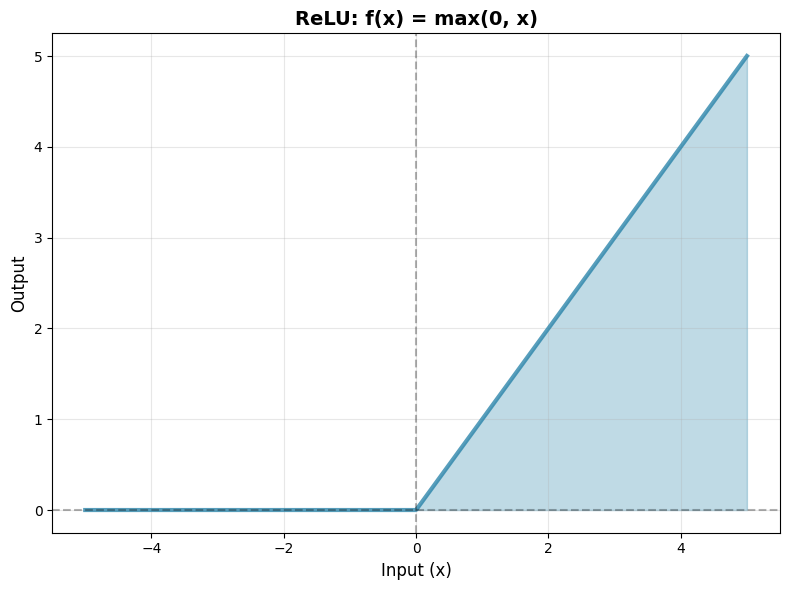

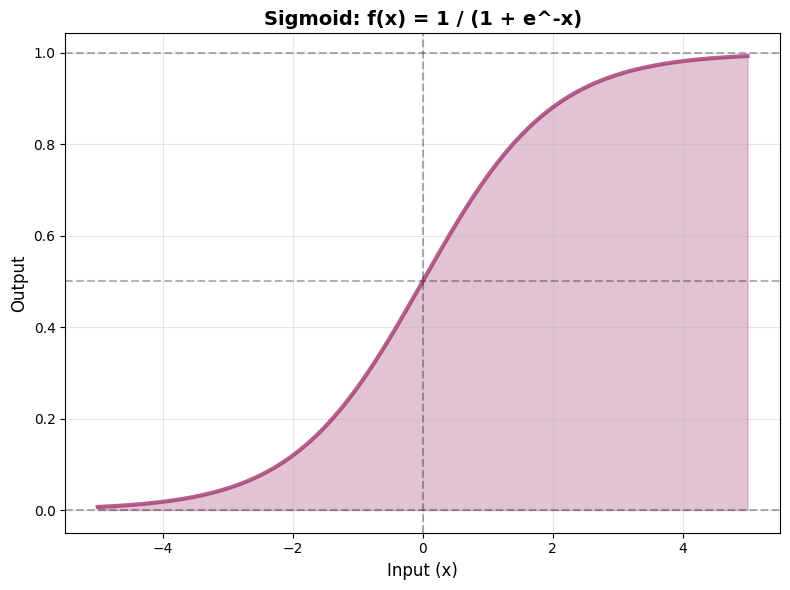

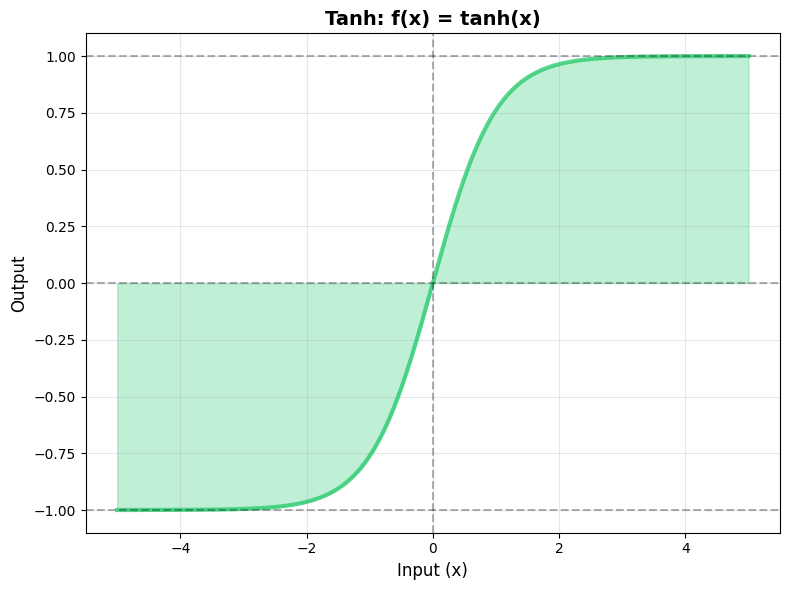

In [3]:
# @title
def plot_activation_functions_separated():
    """Visualizes activation functions in separate plots with project styling"""

    x = np.linspace(-5, 5, 1000)
    relu = np.maximum(0, x)
    sigmoid = 1 / (1 + np.exp(-np.clip(x, -500, 500)))
    tanh = np.tanh(x)

    x_soft = np.linspace(-3, 3, 1000)
    y1 = x_soft + 1
    y2 = 0.5 * x_soft
    y3 = -x_soft + 0.5
    exp_vals = np.exp(np.array([y1, y2, y3]) - np.max(np.array([y1, y2, y3]), axis=0))
    softmax_vals = exp_vals / np.sum(exp_vals, axis=0)
    sum_example = softmax_vals[:, 500].sum()

    colors = ["#2E86AB", "#A23B72", "#F18F01", "#2ecc71"]

    # 1. ReLU
    plt.figure(figsize=(8, 6))
    plt.plot(x, relu, color=colors[0], linewidth=3, alpha=0.8)
    plt.fill_between(x, 0, relu, where=(relu > 0), alpha=0.3, color=colors[0])
    plt.title("ReLU: f(x) = max(0, x)", fontsize=14, fontweight="bold")
    plt.grid(True, alpha=0.3)
    plt.axhline(y=0, color="black", linestyle="--", alpha=0.3)
    plt.axvline(x=0, color="black", linestyle="--", alpha=0.3)
    plt.xlabel("Input (x)", fontsize=12)
    plt.ylabel("Output", fontsize=12)
    plt.tight_layout()
    plt.show()

    # 2. Sigmoid
    plt.figure(figsize=(8, 6))
    plt.plot(x, sigmoid, color=colors[1], linewidth=3, alpha=0.8)
    plt.fill_between(x, 0, sigmoid, alpha=0.3, color=colors[1])
    plt.title("Sigmoid: f(x) = 1 / (1 + e^-x)", fontsize=14, fontweight="bold")
    plt.grid(True, alpha=0.3)
    plt.axhline(y=0, color="black", linestyle="--", alpha=0.3)
    plt.axhline(y=0.5, color="black", linestyle="--", alpha=0.3)
    plt.axhline(y=1, color="black", linestyle="--", alpha=0.3)
    plt.axvline(x=0, color="black", linestyle="--", alpha=0.3)
    plt.xlabel("Input (x)", fontsize=12)
    plt.ylabel("Output", fontsize=12)
    plt.tight_layout()
    plt.show()

    # 3. Tanh
    plt.figure(figsize=(8, 6))
    plt.plot(x, tanh, color=colors[3], linewidth=3, alpha=0.8)
    plt.fill_between(x, 0, tanh, alpha=0.3, color=colors[3])
    plt.title("Tanh: f(x) = tanh(x)", fontsize=14, fontweight="bold")
    plt.grid(True, alpha=0.3)
    plt.axhline(y=0, color="black", linestyle="--", alpha=0.3)
    plt.axhline(y=1, color="black", linestyle="--", alpha=0.3)
    plt.axhline(y=-1, color="black", linestyle="--", alpha=0.3)
    plt.axvline(x=0, color="black", linestyle="--", alpha=0.3)
    plt.xlabel("Input (x)", fontsize=12)
    plt.ylabel("Output", fontsize=12)
    plt.tight_layout()
    plt.show()

    # 4. Softmax
    plt.figure(figsize=(10, 6))
    plt.plot(x_soft, softmax_vals[0], color=colors[0], linewidth=3, alpha=0.8, label="Neuron A")
    plt.plot(x_soft, softmax_vals[1], color=colors[1], linewidth=3, alpha=0.8, label="Neuron B")
    plt.plot(x_soft, softmax_vals[2], color=colors[2], linewidth=3, alpha=0.8, label="Neuron C")
    plt.fill_between(x_soft, 0, softmax_vals[0], alpha=0.3, color=colors[0])
    plt.fill_between(x_soft, 0, softmax_vals[1], alpha=0.3, color=colors[1])
    plt.fill_between(x_soft, 0, softmax_vals[2], alpha=0.3, color=colors[2])
    plt.axhline(y=1, color="black", linestyle="--", alpha=0.3)
    plt.axhline(y=0, color="black", linestyle="--", alpha=0.3)
    plt.title("Softmax: Multiclass Probability Distribution", fontsize=14, fontweight="bold")
    plt.xlabel("Input Score", fontsize=12)
    plt.ylabel("Probability", fontsize=12)
    plt.ylim(0, 1.1)
    plt.text(
        0,
        0.5,
        f"Sum = {sum_example:.2f} at x={x_soft[500]:.2f}",
        ha="center",
        fontsize=10,
        bbox=dict(boxstyle="round,pad=0.4", facecolor="lightyellow", alpha=0.9)
    )
    plt.legend()
    plt.tight_layout()
    plt.show()

# Ejecutar función
plot_activation_functions_separated()


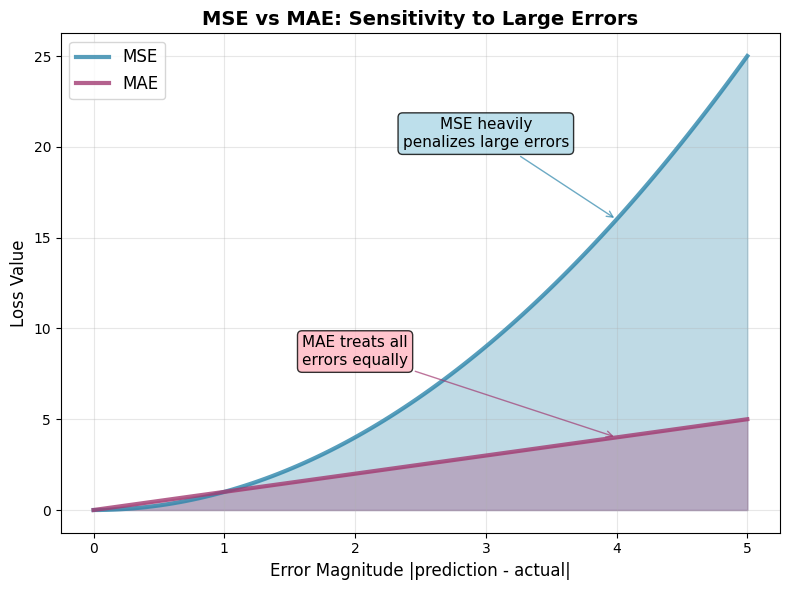

In [4]:
# @title
def visualize_loss_functions_separated():
    """Visualizes loss functions in individual figures"""

    colors = ["#2E86AB", "#A23B72", "#F18F01", "#2ecc71"]

    # 1. MSE vs MAE (regression)
    errors = np.linspace(0, 5, 100)
    mse_values = errors**2
    mae_values = np.abs(errors)

    plt.figure(figsize=(8, 6))
    plt.plot(errors, mse_values, color=colors[0], linewidth=3, label="MSE", alpha=0.8)
    plt.plot(errors, mae_values, color=colors[1], linewidth=3, label="MAE", alpha=0.8)
    plt.fill_between(errors, 0, mse_values, alpha=0.3, color=colors[0])
    plt.fill_between(errors, 0, mae_values, alpha=0.3, color=colors[1])
    plt.title("MSE vs MAE: Sensitivity to Large Errors", fontsize=14, fontweight="bold")
    plt.xlabel("Error Magnitude |prediction - actual|", fontsize=12)
    plt.ylabel("Loss Value", fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.annotate(
        "MSE heavily\npenalizes large errors",
        xy=(4, 16),
        xytext=(3, 20),
        arrowprops=dict(arrowstyle="->", color=colors[0], alpha=0.7),
        fontsize=11,
        ha="center",
        bbox=dict(boxstyle="round", facecolor="lightblue", alpha=0.8),
    )
    plt.annotate(
        "MAE treats all\nerrors equally",
        xy=(4, 4),
        xytext=(2, 8),
        arrowprops=dict(arrowstyle="->", color=colors[1], alpha=0.7),
        fontsize=11,
        ha="center",
        bbox=dict(boxstyle="round", facecolor="lightpink", alpha=0.8),
    )
    plt.tight_layout()
    plt.show()

    # 2. CrossEntropy vs incorrect confidence
    incorrect_prob = np.linspace(0.01, 0.99, 100)
    cross_entropy = -np.log(1 - incorrect_prob)

    plt.figure(figsize=(8, 6))
    plt.plot(incorrect_prob, cross_entropy, color=colors[2], linewidth=3, alpha=0.8)
    plt.fill_between(incorrect_prob, 0, cross_entropy, alpha=0.3, color=colors[2])
    plt.title(
        "CrossEntropy: Penalty for Incorrect Confidence", fontsize=14, fontweight="bold"
    )
    plt.xlabel("Confidence in INCORRECT Answer", fontsize=12)
    plt.ylabel("CrossEntropy Loss", fontsize=12)
    plt.ylim(0, 5)
    plt.grid(True, alpha=0.3)
    plt.annotate(
        "Very confident\nbut WRONG → Severe penalty",
        xy=(0.9, 2.3),
        xytext=(0.7, 4),
        arrowprops=dict(arrowstyle="->", color="red", alpha=0.7),
        fontsize=11,
        ha="center",
        bbox=dict(boxstyle="round", facecolor="lightcoral", alpha=0.8),
    )
    plt.annotate(
        "Low confidence\nand wrong → Mild penalty",
        xy=(0.1, 0.1),
        xytext=(0.3, 1.5),
        arrowprops=dict(arrowstyle="->", color="green", alpha=0.7),
        fontsize=11,
        ha="center",
        bbox=dict(boxstyle="round", facecolor="lightgreen", alpha=0.8),
    )
    plt.tight_layout()
    plt.show()

    # 3. CrossEntropy vs MSE (classification)
    correct_confidence = np.linspace(0.01, 0.99, 100)
    cross_entropy = -np.log(correct_confidence)
    mse = (1 - correct_confidence) ** 2

    plt.figure(figsize=(8, 6))
    plt.plot(
        correct_confidence,
        cross_entropy,
        color=colors[0],
        linewidth=3,
        label="CrossEntropy",
        alpha=0.8,
    )
    plt.plot(
        correct_confidence,
        mse,
        color=colors[1],
        linewidth=3,
        label="MSE (not recommended)",
        alpha=0.8,
    )
    plt.title("CrossEntropy vs MSE in Classification", fontsize=14, fontweight="bold")
    plt.xlabel("Confidence in CORRECT Answer", fontsize=12)
    plt.ylabel("Loss Value", fontsize=12)
    plt.ylim(0, 5)
    plt.axvspan(0.8, 1.0, alpha=0.2, color="green", label="Target zone")
    plt.legend(fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.text(
        0.9,
        0.5,
        "Target zone\n(high confidence)",
        fontsize=10,
        ha="center",
        bbox=dict(boxstyle="round", facecolor="lightgreen", alpha=0.8),
    )
    plt.tight_layout()
    plt.show()

    # 4. Simulated training loss curves
    epochs = np.arange(1, 101)
    np.random.seed(42)
    train_loss = 2.5 * np.exp(-epochs / 20) + 0.1 + 0.05 * np.random.normal(0, 1, 100)
    val_loss = 2.5 * np.exp(-epochs / 25) + 0.15 + 0.08 * np.random.normal(0, 1, 100)

    from scipy.ndimage import gaussian_filter1d

    train_smooth = gaussian_filter1d(train_loss, sigma=2)
    val_smooth = gaussian_filter1d(val_loss, sigma=2)

    plt.figure(figsize=(10, 6))
    plt.plot(
        epochs,
        train_smooth,
        color=colors[0],
        linewidth=3,
        label="Training Loss",
        alpha=0.8,
    )
    plt.plot(
        epochs,
        val_smooth,
        color=colors[1],
        linewidth=3,
        label="Validation Loss",
        alpha=0.8,
    )
    plt.fill_between(epochs, 0, train_smooth, alpha=0.3, color=colors[0])
    plt.fill_between(epochs, 0, val_smooth, alpha=0.3, color=colors[1])
    plt.title("Typical Loss Evolution During Training", fontsize=14, fontweight="bold")
    plt.xlabel("Epoch", fontsize=12)
    plt.ylabel("Loss Value", fontsize=12)
    plt.ylim(0, 2.5)
    plt.legend(fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.annotate(
        "Initial rapid\nlearning",
        xy=(10, 1.5),
        xytext=(25, 2.2),
        arrowprops=dict(arrowstyle="->", color="blue", alpha=0.7),
        fontsize=10,
        ha="center",
        bbox=dict(boxstyle="round", facecolor="lightblue", alpha=0.8),
    )
    plt.annotate(
        "Convergence\nstabilization",
        xy=(70, 0.3),
        xytext=(50, 1.0),
        arrowprops=dict(arrowstyle="->", color="green", alpha=0.7),
        fontsize=10,
        ha="center",
        bbox=dict(boxstyle="round", facecolor="lightgreen", alpha=0.8),
    )
    plt.tight_layout()
    plt.show()


# Ejecutar
visualize_loss_functions_separated()